# Data Analysis

The goal of the following notebook is to give the viewer an overview of the underlying data set. 

In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sys
import scipy.stats as stats


In [2]:
#load data 
data=pd.read_csv('cleaned_data_2024.csv',low_memory=True)


C:\Users\chris\AppData\Local\Temp\ipykernel_7320\1037829232.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('cleaned_data_2024.csv',low_memory=True)


In [3]:
data.head()

,Price,Manufacturer,Model,Mileage,Power_HP,Fuel,Drive_type,Body_type,Vehicle_type,Seats,...,Komfort_3-Zonen-Klimaautomatik360° Kamera,Komfort_Schiebetür linksteilb. Rücksitzbank,Komfort_Standheizungteilb. Rücksitzbank,Komfort_Klimaanlage,Komfort_Schiebetür rechtsteilb. Rücksitzbank,Komfort_2-Zonen-Klimaautomatik,Komfort_Klimaautomatikteilb. Rücksitzbank,Date_scraped,Erstzulassung_Jahr,Age
0,15000.0,Mercedes-Benz,180,35000.0,90.0,Super,Heck,Limousine,Gebraucht,5.0,...,0,0,0,1,0,0,0,2024-05-11 10:44:50,1997,27.25
1,5300.0,Mercedes-Benz,180,61000.0,90.0,Super,Heck,Limousine,Gebraucht,5.0,...,0,0,0,1,0,0,0,2024-05-11 10:44:57,1999,25.17
2,8000.0,Mercedes-Benz,180,166000.0,115.0,Super,Heck,Limousine,Gebraucht,5.0,...,0,0,0,0,0,0,0,2024-05-11 10:45:33,2008,15.92
3,10000.0,Mercedes-Benz,180,90000.0,115.0,Super,Heck,Limousine,Gebraucht,5.0,...,0,0,0,1,0,0,0,2024-05-11 10:45:55,2012,12.25
4,9700.0,Mercedes-Benz,180,158444.0,80.0,Diesel,Heck,Kombi,Gebraucht,5.0,...,0,0,0,1,0,0,0,2024-05-11 10:46:00,2013,10.50


In [4]:
data.dtypes

Price                                        float64
Manufacturer                                  object
Model                                         object
Mileage                                      float64
Power_HP                                     float64
                                              ...   
Komfort_2-Zonen-Klimaautomatik                 int64
Komfort_Klimaautomatikteilb. Rücksitzbank      int64
Date_scraped                                  object
Erstzulassung_Jahr                             int64
Age                                          float64
Length: 626, dtype: object

## Summary statistics

In [6]:
data.describe()

,Price,Mileage,Power_HP,Seats,Doors,Owners,Displacement,Cylinders,Fuel_consumption,Curb_weight,...,Komfort_360° Kamera4-Zonen-Klimaautomatik,Komfort_3-Zonen-Klimaautomatik360° Kamera,Komfort_Schiebetür linksteilb. Rücksitzbank,Komfort_Standheizungteilb. Rücksitzbank,Komfort_Klimaanlage,Komfort_Schiebetür rechtsteilb. Rücksitzbank,Komfort_2-Zonen-Klimaautomatik,Komfort_Klimaautomatikteilb. Rücksitzbank,Erstzulassung_Jahr,Age
count,4.599910e+05,4.599910e+05,459991.000000,459991.000000,459991.000000,459991.000000,459991.000000,459991.000000,459991.000000,459991.000000,...,459991.000000,459991.000000,459991.000000,459991.000000,459991.000000,459991.000000,459991.000000,459991.000000,459991.000000,459991.000000
mean,2.776070e+04,7.700842e+04,132.002953,4.856975,4.300336,1.427117,98.420058,3.930242,4.953914,25.627203,...,0.018159,0.016000,0.000004,0.000980,0.642719,0.000339,0.270975,0.000580,2017.660063,6.248586
std,2.531805e+04,7.597229e+04,73.170760,1.089198,0.908240,0.505261,293.538859,1.401683,5.820912,147.276620,...,0.133527,0.125476,0.002085,0.031297,0.479199,0.018413,0.444464,0.024085,5.867675,5.849509
min,3.900000e+02,0.000000e+00,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1990.000000,-0.580000
25%,1.299000e+04,1.764450e+04,85.000000,5.000000,4.000000,1.000000,1.496000,4.000000,0.000000,1.355000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,1.670000
50%,2.240600e+04,5.800000e+04,110.000000,5.000000,5.000000,1.000000,1.968000,4.000000,5.300000,1.577000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2019.000000,4.500000
75%,3.499000e+04,1.170000e+05,150.000000,5.000000,5.000000,2.000000,2.198000,4.000000,6.700000,1.869000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2022.000000,8.920000
max,1.975000e+06,9.001000e+06,999.000000,208.000000,6.000000,3.000000,999.000000,99.000000,701.000000,999.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2024.000000,34.330000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459991 entries, 0 to 459990
Columns: 626 entries, Price to Age
dtypes: float64(15), int64(595), object(16)
memory usage: 2.1+ GB


In [9]:
data.isnull().sum() #column wise sum of missing values

Price                                        0
Manufacturer                                 0
Model                                        0
Mileage                                      0
Power_HP                                     0
                                            ..
Komfort_2-Zonen-Klimaautomatik               0
Komfort_Klimaautomatikteilb. Rücksitzbank    0
Date_scraped                                 0
Erstzulassung_Jahr                           0
Age                                          0
Length: 626, dtype: int64

## Drop irrelevant Columns for Analysis

In [10]:
#Dropping enginer fuel type and number of doors as they are of less relevenace in this dataset.
data.drop(['Doors','Owners','Environmental_sticker','URL','Electricity_consumption','Electric_range'],axis=1,inplace=True)

In [11]:
# Identify columns that start with 'Komfort_'
columns_to_drop = [col for col in data.columns if col.startswith('Komfort_')]
data.drop(columns=columns_to_drop,axis=1,inplace=True)
# Identify columns that start with 'Komfort_'
columns_to_drop = [col for col in data.columns if col.startswith('Sicherheit_')]
data.drop(columns=columns_to_drop,axis=1,inplace=True)
columns_to_drop = [col for col in data.columns if col.startswith('Extras_')]
data.drop(columns=columns_to_drop,axis=1,inplace=True)
columns_to_drop = [col for col in data.columns if col.startswith('Innenausstattung_')]
data.drop(columns=columns_to_drop,axis=1,inplace=True)
columns_to_drop = [col for col in data.columns if col.startswith('Unterhaltung/Media_')]
data.drop(columns=columns_to_drop,axis=1,inplace=True)

data.head()

,Price,Manufacturer,Model,Mileage,Power_HP,Fuel,Drive_type,Body_type,Vehicle_type,Seats,...,Non_smoker_vehicle,Curb_weight,CO2_emissions,Paint,Full_service_history,Warranty,Taxi_or_rental,Date_scraped,Erstzulassung_Jahr,Age
0,15000.0,Mercedes-Benz,180,35000.0,90.0,Super,Heck,Limousine,Gebraucht,5.0,...,Ja,1.350,127.0,Metallic,Ja,0.0,Nein,2024-05-11 10:44:50,1997,27.25
1,5300.0,Mercedes-Benz,180,61000.0,90.0,Super,Heck,Limousine,Gebraucht,5.0,...,Nein,1.350,127.0,Metallic,Ja,0.0,Nein,2024-05-11 10:44:57,1999,25.17
2,8000.0,Mercedes-Benz,180,166000.0,115.0,Super,Heck,Limousine,Gebraucht,5.0,...,Ja,1.495,132.0,Metallic,Nein,0.0,Nein,2024-05-11 10:45:33,2008,15.92
3,10000.0,Mercedes-Benz,180,90000.0,115.0,Super,Heck,Limousine,Gebraucht,5.0,...,Ja,1.495,132.0,Metallic,Ja,0.0,Nein,2024-05-11 10:45:55,2012,12.25
4,9700.0,Mercedes-Benz,180,158444.0,80.0,Diesel,Heck,Kombi,Gebraucht,5.0,...,Ja,1.500,101.0,Keine Angabe,Ja,0.0,Nein,2024-05-11 10:46:00,2013,10.50


# Determine Duplicates

In [12]:
print(data.duplicated().sum())


0


In [13]:
data.shape

(459991, 26)

# Descrptive Analysis

Text(0.5, 1.0, 'Distribution of Cars based on Year of admission')

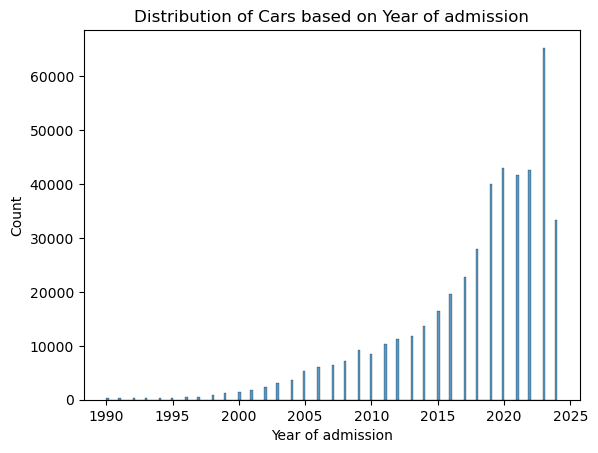

In [16]:
# Plot the distribution of the car age
sns.histplot(data["Erstzulassung_Jahr"],bins='auto')
plt.xlabel('Year of admission')
plt.title('Distribution of Cars based on Year of admission')

(0.0, 200000.0)

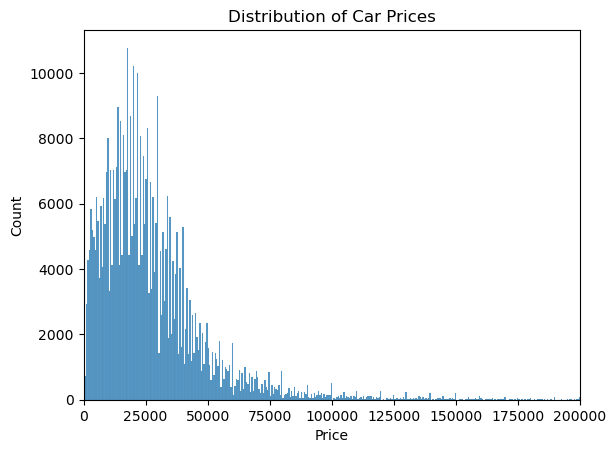

In [18]:
#plot distribution of Prices
sns.histplot(data["Price"],bins='auto')
plt.xlabel('Price')
plt.title('Distribution of Car Prices')
plt.xlim(0,200000)

(0.0, 400.0)

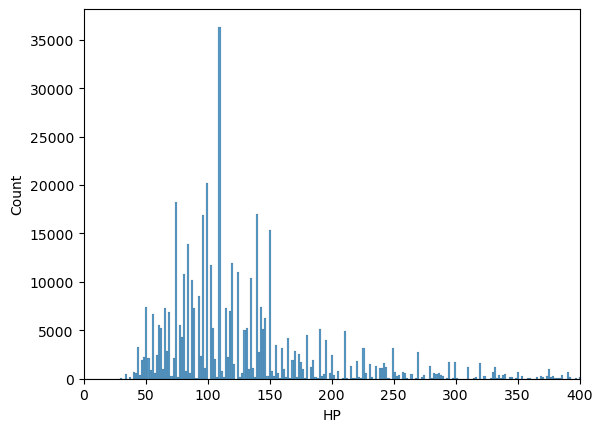

In [20]:
sns.histplot(data["Power_HP"],bins='auto')
plt.xlabel('HP')
plt.xlim(0,400)

(0.0, 400000.0)

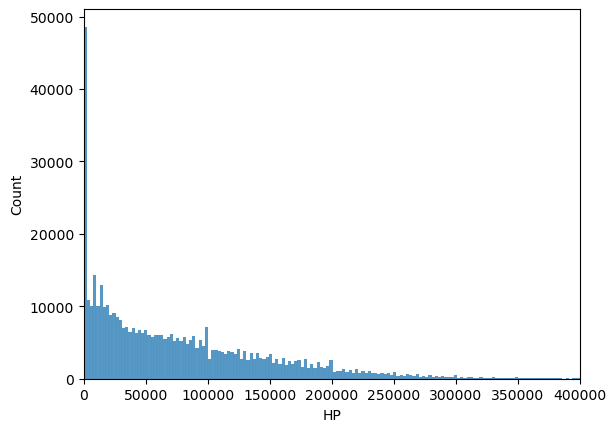

In [21]:
sns.histplot(data["Mileage"],bins='auto')
plt.xlabel('HP')
plt.xlim(0,400000)

In [18]:
cars =data['Manufacturer'].value_counts(ascending=False)
others=cars[16:].sum()
cars[16]=others
print(cars[:10])# to print the top 10 car brands

Mercedes-Benz    67131
Volkswagen       49652
BMW              41696
Audi             38325
Ford             30463
Opel             21810
Renault          16709
Hyundai          15916
Skoda            11889
Peugeot          11688
Name: Manufacturer, dtype: int64


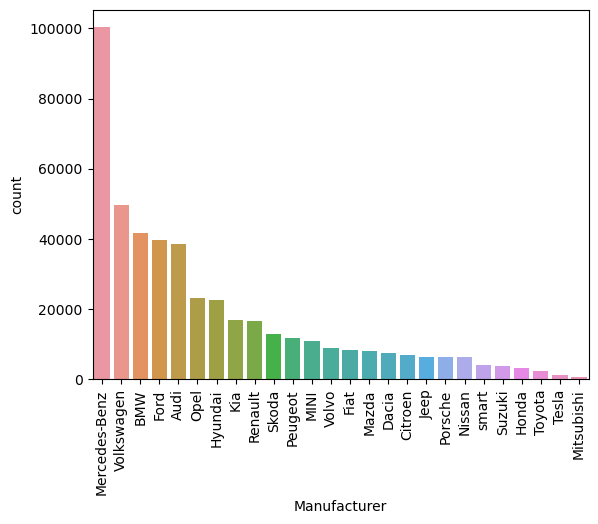

In [22]:
# Create a count plot for 'Transmission'
sns.countplot(data=data, x='Manufacturer',order=data['Manufacturer'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [20]:
cars =data[['Manufacturer','Model']].value_counts(ascending=False)
others=cars[16:].sum()
cars[16]=others
print(cars[:10])# to print the top 10 car brands

Manufacturer  Model 
Volkswagen    Golf      6389
Audi          A3        5566
              A4        5246
Ford          Focus     4731
Volkswagen    Polo      4595
Opel          astra     4434
Ford          Fiesta    4347
Audi          A6        4333
Opel          corsa     4007
BMW           320       3517
dtype: int64


Mercedes Benz, Volkswagen and BMW are the most represented Brands in this car

In [23]:
avg_price = data.groupby(['Manufacturer', 'Model']).agg(
    mean_price=('Price', 'mean'),
    count=('Price', 'size')
).reset_index()

avg_price['mean_price'] = avg_price['mean_price'].round(2)


In [24]:
data.corr()

C:\Users\chris\AppData\Local\Temp\ipykernel_7320\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Price,Mileage,Power_HP,Seats,Displacement,Cylinders,Fuel_consumption,Curb_weight,CO2_emissions,Warranty,Erstzulassung_Jahr,Age
Price,1.000000,-0.391514,0.720716,0.022655,-0.147717,0.287986,-0.018470,-0.122111,0.183943,0.161702,0.444373,-0.444265
Mileage,-0.391514,1.000000,-0.092163,-0.000774,-0.167513,0.239143,0.211360,-0.000387,0.226210,-0.298334,-0.714291,0.714483
Power_HP,0.720716,-0.092163,1.000000,-0.002554,-0.269418,0.451209,0.061124,-0.176288,0.261186,0.056303,0.167994,-0.168650
Seats,0.022655,-0.000774,-0.002554,1.000000,-0.053844,-0.010561,-0.023495,-0.132737,-0.012502,0.043580,0.094097,-0.094723
Displacement,-0.147717,-0.167513,-0.269418,-0.053844,1.000000,-0.211505,-0.048049,0.267161,-0.100088,0.029616,0.127547,-0.127356
Cylinders,0.287986,0.239143,0.451209,-0.010561,-0.211505,1.000000,0.272026,-0.063789,0.685231,-0.088256,-0.218202,0.219293
Fuel_consumption,-0.018470,0.211360,0.061124,-0.023495,-0.048049,0.272026,1.000000,-0.006350,0.385271,-0.131837,-0.251430,0.252419
Curb_weight,-0.122111,-0.000387,-0.176288,-0.132737,0.267161,-0.063789,-0.006350,1.000000,-0.063343,-0.011732,-0.094827,0.095115
CO2_emissions,0.183943,0.226210,0.261186,-0.012502,-0.100088,0.685231,0.385271,-0.063343,1.000000,-0.096056,-0.263585,0.265372
Warranty,0.161702,-0.298334,0.056303,0.043580,0.029616,-0.088256,-0.131837,-0.011732,-0.096056,1.000000,0.320498,-0.320256


C:\Users\chris\AppData\Local\Temp\ipykernel_7320\1766827426.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)


Text(0.5, 1.0, 'Correlation Matrix of selected Variables')

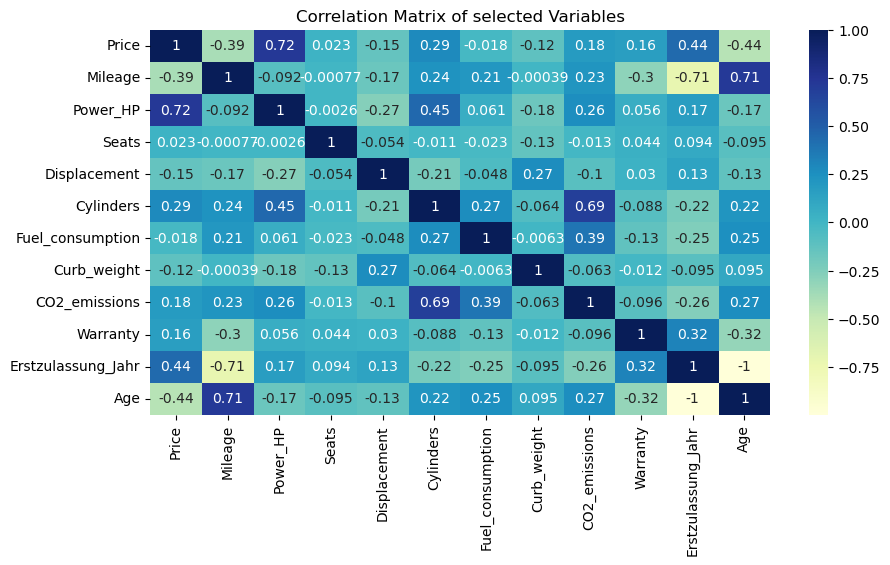

In [25]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)
plt.title('Correlation Matrix of selected Variables')

Insights:

Milage and car age are highly correlated with each other

The number of Cylinders is correlated strongly correlated with the $CO_2-Consumption$

In [24]:
def perform_one_way_anova(df, column, grouping_column):
    # Separate data into groups
    groups = df.groupby(grouping_column)[column].apply(list).values

    # Perform one-way ANOVA
    f_stat, p_val = stats.f_oneway(*groups)
    
    return f_stat, p_val

<Axes: xlabel='Transmission', ylabel='count'>

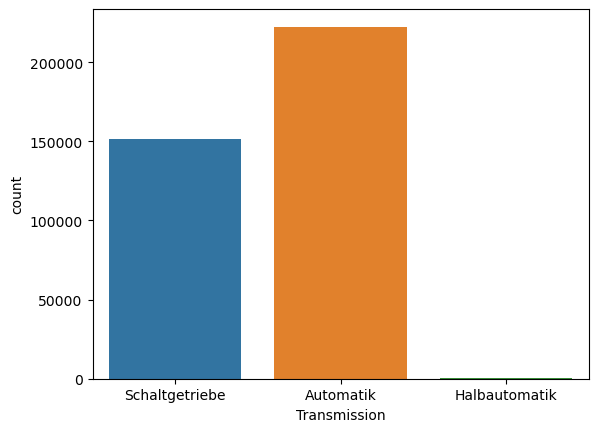

In [25]:
# Create a count plot for 'Transmission'
sns.countplot(data=data, x='Transmission')

Most people seem to prefer automatic transmission over manual transmission. Semi-automatic transmission is not in favour 

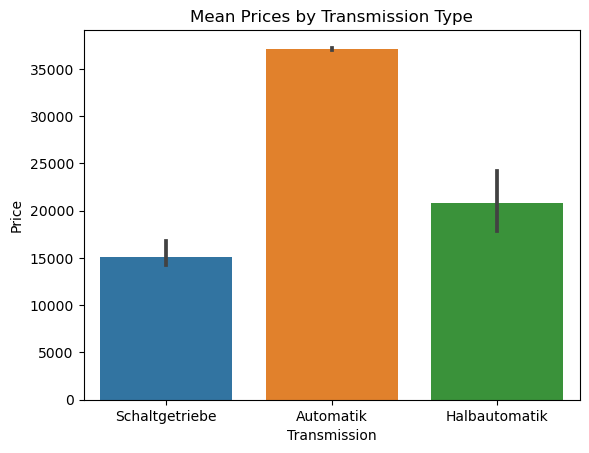

F-statistic: 527.8492319844653, P-value: 0.0


In [26]:
sns.barplot(data=data, x='Transmission', y='Price', estimator=np.mean)
plt.title('Mean Prices by Transmission Type')
plt.show()

# Load your data
column_name = 'Price'  # Specify the column name
grouping_column_name = 'Transmission'  # Specify the grouping column

f_statistic, p_value = perform_one_way_anova(data, column_name, grouping_column_name)
print(f"F-statistic: {f_statistic}, P-value: {p_value.round(2)}")

The mean prices seem also to differ in the groups, we check this with performing a one way anova

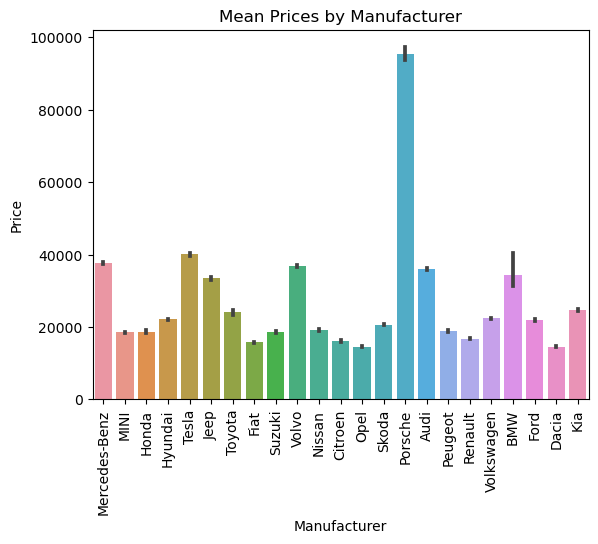

F-statistic: 61.78543478993354, P-value: 0.0


In [27]:
sns.barplot(data=data, x='Manufacturer', y='Price', estimator=np.mean)
plt.title('Mean Prices by Manufacturer')
plt.xticks(rotation=90)
plt.show()

# Load your data
column_name = 'Price'  # Specify the column name
grouping_column_name = 'Manufacturer'  # Specify the grouping column

f_statistic, p_value = perform_one_way_anova(data, column_name, grouping_column_name)
print(f"F-statistic: {f_statistic}, P-value: {p_value.round(2)}")

In [28]:
data.dtypes

Price                   float64
Manufacturer             object
Model                    object
Mileage                 float64
Power_HP                float64
Fuel                     object
Drive_type               object
Body_type                object
Vehicle_type             object
Seats                   float64
Transmission             object
Displacement            float64
Cylinders               float64
Fuel_consumption        float64
Emission_class           object
Exterior_color           object
Non_smoker_vehicle       object
Curb_weight             float64
CO2_emissions           float64
Paint                    object
Full_service_history     object
Warranty                float64
Taxi_or_rental           object
Date_scraped             object
Erstzulassung_Jahr        int64
Age                     float64
dtype: object

C:\Users\chris\AppData\Local\Temp\ipykernel_18392\1873308759.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data[var_interest]=data[{var_interest}].astype('category')


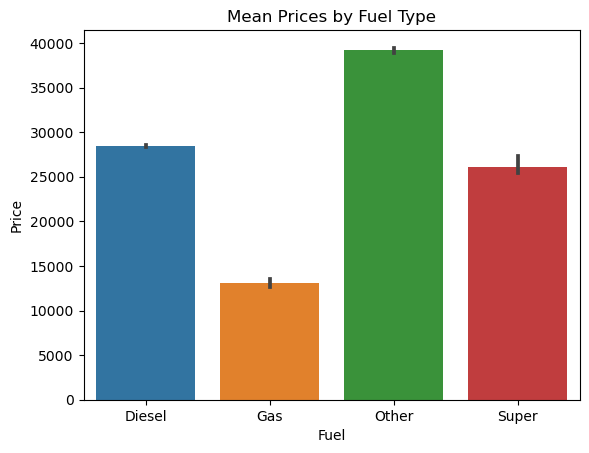

F-statistic: 47.58274845940134, P-value: 0.0


In [29]:
var_interest='Fuel'
data[var_interest]=data[{var_interest}].astype('category')
sns.barplot(data=data, x=f'{var_interest}', y='Price', estimator=np.mean)
plt.title(f'Mean Prices by {var_interest} Type')
plt.show()

# Load your data
column_name = 'Price'  # Specify the column name
grouping_column_name = var_interest  # Specify the grouping column

f_statistic, p_value = perform_one_way_anova(data, column_name, grouping_column_name)
print(f"F-statistic: {f_statistic}, P-value: {p_value.round(2)}")

C:\Users\chris\AppData\Local\Temp\ipykernel_18392\2341142548.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data[var_interest]=data[{var_interest}].astype('category')


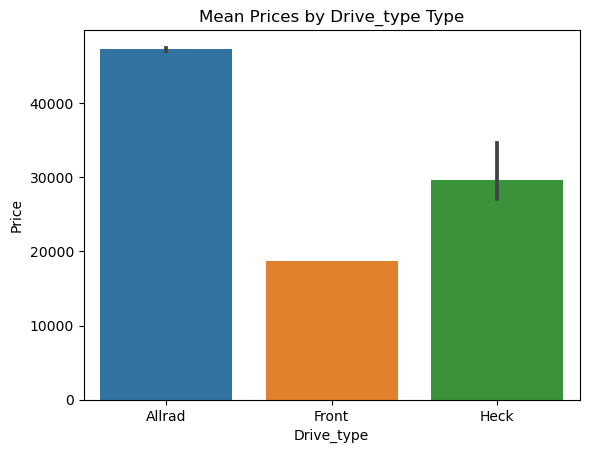

F-statistic: 700.5187018175723, P-value: 0.0


In [30]:
var_interest='Drive_type'
data[var_interest]=data[{var_interest}].astype('category')
sns.barplot(data=data, x=f'{var_interest}', y='Price', estimator=np.mean)
plt.title(f'Mean Prices by {var_interest} Type')
plt.show()

# Load your data
column_name = 'Price'  # Specify the column name
grouping_column_name = var_interest  # Specify the grouping column

f_statistic, p_value = perform_one_way_anova(data, column_name, grouping_column_name)
print(f"F-statistic: {f_statistic}, P-value: {p_value.round(2)}")

C:\Users\chris\AppData\Local\Temp\ipykernel_18392\3913063935.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data[var_interest]=data[{var_interest}].astype('category')


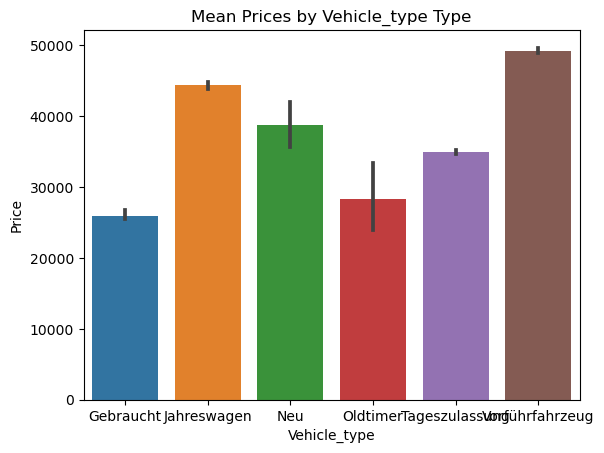

F-statistic: 72.1906043896492, P-value: 0.0


In [31]:
var_interest='Vehicle_type'
data[var_interest]=data[{var_interest}].astype('category')
sns.barplot(data=data, x=f'{var_interest}', y='Price', estimator=np.mean)
plt.title(f'Mean Prices by {var_interest} Type')
plt.show()

# Load your data
column_name = 'Price'  # Specify the column name
grouping_column_name = var_interest  # Specify the grouping column

f_statistic, p_value = perform_one_way_anova(data, column_name, grouping_column_name)
print(f"F-statistic: {f_statistic}, P-value: {p_value.round(2)}")

In [ ]:
sns.scatterplot(data=data,)